In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pred = pd.read_csv('PaLM_test_result1.txt', delimiter='|',header=None, names=['Sentences', 'Present', 'Code Word','Target Word'])
df_actual = pd.read_csv('.././BigQuery/Files/CombinesDS_2.txt', delimiter='|')

In [3]:
df_pred['Present'] = df_pred['Present'].str.lower()
df_pred.head(5)

,Sentences,Present,Code Word,Target Word
0,"all up my nose already haha, was a very very f...",yes,crystal,Methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,Methamphetamine
2,boy you really saved us all with one. almost w...,no,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,#4,Heroin


In [4]:
df_actual.head()

,Sentences,Present,Code Word,Target Word
0,"all up my nose already haha, was a very very f...",yes,crystal,methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,methamphetamine
2,boy you really saved us all with one. almost w...,no,NaN,NaN
3,ask yourself if you would eat another apple,no,NaN,NaN
4,the consistency was very similar to baby powde...,yes,baby powder,cocaine


In [5]:
df_actual = df_actual.iloc[:103]
df_actual.shape

(103, 4)

In [6]:
actual_val = df_actual['Present'].astype(str).replace({'yes': 1, 'no': 0})
predicted_val = df_pred['Present'].str.strip().astype(str).replace({'yes': 1, 'no': 0})

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm= confusion_matrix(actual_val, predicted_val)
print("Confusion Matrix:\n", cm)

report = classification_report(actual_val, predicted_val)
print("Classification Report:\n", report)

print(f"Accuracy is {accuracy_score(actual_val, predicted_val)}")

Confusion Matrix:
 [[54  4]
 [ 8 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        58
           1       0.90      0.82      0.86        45

    accuracy                           0.88       103
   macro avg       0.89      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103

Accuracy is 0.883495145631068


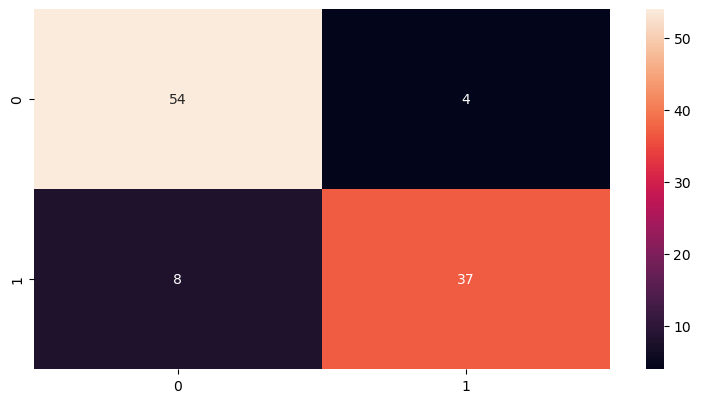

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig1=plt.figure(figsize=(8,4))
ax1=fig1.add_axes([0.1,0.1,0.9,0.9])
sns.heatmap(cm,annot=True, fmt='g')

plt.show()

In [10]:
df_pred2 = df_pred
df_pred2 = df_pred2.rename(columns={'Present': 'Pred_Present', 'Code Word': 'Pred_Code_Word','Target Word':'Pred_target_word'})
df_pred2.head()

,Sentences,Pred_Present,Pred_Code_Word,Pred_target_word
0,"all up my nose already haha, was a very very f...",yes,crystal,Methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,Methamphetamine
2,boy you really saved us all with one. almost w...,no,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,#4,Heroin


In [11]:
df_pred2['Sentences'] = df_pred2['Sentences'].str.strip()
df_actual['Sentences'] = df_actual['Sentences'].str.strip()

In [12]:
matching = df_pred2['Sentences'].equals(df_actual['Sentences'])
if matching:
    print("Column A in both DataFrames is matching")
else:
    print("Column A in both DataFrames is NOT matching")

Column A in both DataFrames is matching


In [13]:
combined = pd.merge(df_actual, df_pred2, on='Sentences')

In [14]:
combined[combined.duplicated()]

,Sentences,Present,Code Word,Target Word,Pred_Present,Pred_Code_Word,Pred_target_word


In [15]:
combined.head()
#combined.to_csv('Result_file_Bart1.txt', sep='|',index=False)

,Sentences,Present,Code Word,Target Word,Pred_Present,Pred_Code_Word,Pred_target_word
0,"all up my nose already haha, was a very very f...",yes,crystal,methamphetamine,yes,crystal,Methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,methamphetamine,yes,crystal,Methamphetamine
2,boy you really saved us all with one. almost w...,no,NaN,NaN,no,NA,NA
3,ask yourself if you would eat another apple,no,NaN,NaN,no,NA,NA
4,the consistency was very similar to baby powde...,yes,baby powder,cocaine,yes,#4,Heroin


In [20]:
def calculate_accuracy(true_labels, predicted_labels):
   
    class_counts = {}
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label in class_counts:
            class_counts[true_label]["total_samples"] += 1
            if true_label == predicted_label:
                class_counts[true_label]["correct_predictions"] += 1
        else:
            class_counts[true_label] = {
                "total_samples": 1,
                "correct_predictions": 1 if true_label == predicted_label else 0
            }
    accuracies = {}
    overall_correct_predictions = 0
    overall_total_samples = 0
    for class_label, counts in class_counts.items():
        accuracy = counts["correct_predictions"] / counts["total_samples"]
        accuracies[class_label] = accuracy
        overall_correct_predictions += counts["correct_predictions"]
        overall_total_samples += counts["total_samples"]

    overall_accuracy = overall_correct_predictions / overall_total_samples
    
    return accuracies, overall_accuracy,class_counts


In [21]:
cw_df= combined[combined['Present']=="yes"]
cw_df = cw_df[['Code Word','Pred_Code_Word']]
cw_df['Code Word'] = cw_df['Code Word'].str.strip().str.lower()
cw_df['Pred_Code_Word'] = cw_df['Pred_Code_Word'].str.strip().str.lower()

In [23]:
true_labels = cw_df['Code Word']
predicted_labels = cw_df['Pred_Code_Word']

class_accuracies, overall_accuracy,class_counts = calculate_accuracy(true_labels, predicted_labels)

print("Class accuracies:", class_accuracies)
print("Overall accuracy:", overall_accuracy)
print(class_counts)

Class accuracies: {'crystal': 1.0, 'baby powder': 0.0, 'fish scale': 0.6666666666666666, 'acid': 1.0, 'haze': 0.5, 'coke': 1.0, 'chiva': 1.0, 'candy': 0.0, 'blue jeans': 0.5, 'snowflake': 1.0, 'ganja': 1.0, 'weed': 1.0, 'love drug': 1.0, 'la tierra': 0.5, 'kleenex': 0.0, 'dust': 0.5, 'china white': 1.0, 'gold dust': 1.0, 'pot': 1.0, 'brown sugar': 0.0, 'vitamin k': 0.0, 'grass': 1.0, 'barry farrell': 1.0}
Overall accuracy: 0.6444444444444445
{'crystal': {'total_samples': 3, 'correct_predictions': 3}, 'baby powder': {'total_samples': 5, 'correct_predictions': 0}, 'fish scale': {'total_samples': 3, 'correct_predictions': 2}, 'acid': {'total_samples': 3, 'correct_predictions': 3}, 'haze': {'total_samples': 2, 'correct_predictions': 1}, 'coke': {'total_samples': 3, 'correct_predictions': 3}, 'chiva': {'total_samples': 3, 'correct_predictions': 3}, 'candy': {'total_samples': 2, 'correct_predictions': 0}, 'blue jeans': {'total_samples': 2, 'correct_predictions': 1}, 'snowflake': {'total_samp

In [24]:
rows = [{'Code word': class_name, 'Total Samples': values['total_samples'], 'Correct Predictions': values['correct_predictions']}
        for class_name, values in class_counts.items()]

In [25]:
df_eval_cw = pd.DataFrame(rows)

In [26]:
df_eval_cw.to_csv('palm2_CW_stat1.csv', sep=',',index=False)